**Importing Libraries and Loading Data**

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from xgboost import XGBRegressor

In [117]:
df=pd.read_csv("/House Prices Prediction.csv")

In [118]:
df.shape

(2000, 10)

**Data Information**

In [119]:
df.head()

,Location,Area,Bedroom,Bathroom,Floor,View,Facing,Elevator,Payment System,Price
0,New Administrative Capital,160,3,3,5,Garden,South,Yes,Cash,4400000
1,Heliopolis,140,3,3,4,Apartment Building,North,Yes,Instalment,3500000
2,Zahraa El Maadi,150,3,2,2,Street,North,Yes,Cash,4500000
3,First Settlement,140,3,2,2,Garden,North,Yes,Cash,3100000
4,Rod El Farag,180,3,3,5,Garden,South,Yes,Cash,4300000


In [120]:
df.isnull().sum()

,0
Location,0
Area,0
Bedroom,0
Bathroom,0
Floor,0
View,0
Facing,0
Elevator,0
Payment System,0
Price,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Location        2000 non-null   object
 1   Area            2000 non-null   int64 
 2   Bedroom         2000 non-null   int64 
 3   Bathroom        2000 non-null   int64 
 4   Floor           2000 non-null   int64 
 5   View            2000 non-null   object
 6   Facing          2000 non-null   object
 7   Elevator        2000 non-null   object
 8   Payment System  2000 non-null   object
 9   Price           2000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 156.4+ KB


**Exploratory data analysis (EDA) and Visualization**

In [122]:
df.describe().style.background_gradient(cmap='coolwarm')

,Area,Bedroom,Bathroom,Floor,Price
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,137.590000,2.681500,1.846500,3.469000,3334050.000000
std,34.671212,0.645187,0.811953,1.639019,1769890.350679
min,90.000000,2.000000,1.000000,1.000000,1000000.000000
25%,110.000000,2.000000,1.000000,2.000000,1675000.000000
50%,140.000000,3.000000,2.000000,4.000000,3450000.000000
75%,160.000000,3.000000,3.000000,5.000000,4500000.000000
max,250.000000,4.000000,3.000000,6.000000,8700000.000000


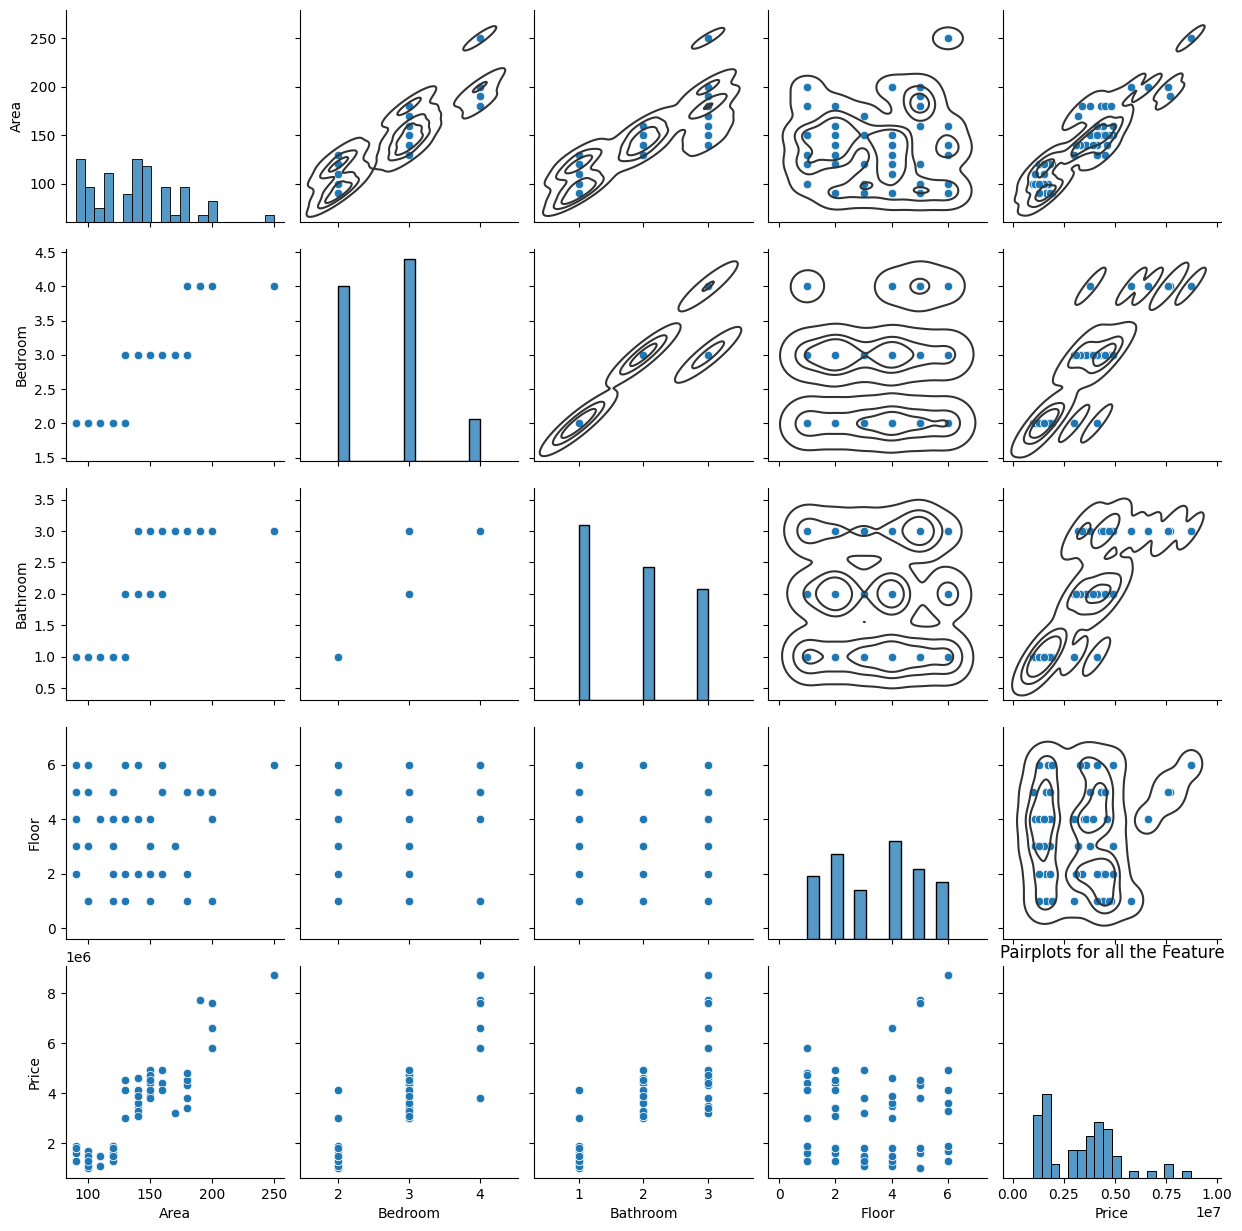

In [123]:
# Understanding the relationship between all the features
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

**Data processing**

In [124]:
# Replace Categorical with Numerical Values
df['View'] = df['View'].replace({'Garden': 2, 'Apartment Building': 1, 'Street': 0, 'Apartment': 1})
df['Facing'] = df['Facing'].replace({'South': 1, 'North': 0})
df['Elevator'] = df['Elevator'].replace({'Yes': 1, 'No': 0})
df['Payment System'] = df['Payment System'].replace({'Cash': 1, 'Instalment': 0})

/tmp/ipython-input-124-4169688708.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['View'] = df['View'].replace({'Garden': 2, 'Apartment Building': 1, 'Street': 0, 'Apartment': 1})
/tmp/ipython-input-124-4169688708.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Facing'] = df['Facing'].replace({'South': 1, 'North': 0})
/tmp/ipython-input-124-4169688708.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer

In [125]:
# Removal of any Duplicate rows (if any)

counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 461


In [126]:
df.shape

(1539, 10)

In [127]:
# Divide Price Column by 1 million

df['Price'] = df['Price'] / 1000000

In [128]:
df.head()

,Location,Area,Bedroom,Bathroom,Floor,View,Facing,Elevator,Payment System,Price
0,New Administrative Capital,160,3,3,5,2,1,1,1,4.4
1,Heliopolis,140,3,3,4,1,0,1,0,3.5
2,Zahraa El Maadi,150,3,2,2,0,0,1,1,4.5
3,First Settlement,140,3,2,2,2,0,1,1,3.1
4,Rod El Farag,180,3,3,5,2,1,1,1,4.3


In [129]:
# Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                Total Null Values  Percentage
Location                        0         0.0
Area                            0         0.0
Bedroom                         0         0.0
Bathroom                        0         0.0
Floor                           0         0.0
View                            0         0.0
Facing                          0         0.0
Elevator                        0         0.0
Payment System                  0         0.0
Price                           0         0.0


**Build Machine Learning Models**

In [130]:
# Split Dataset Variables to Dependent (y) and Indepenent Variables (X)
X = df[['Area','Bedroom','Bathroom','Floor','View','Facing','Elevator','Payment System']]
y = df['Price']

In [131]:
# Split Dataset into Train (80%) and Test (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model 1 - Linear Regression**

In [132]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [133]:
y_pred = LR_model.predict(X_test)

**Evaluate Linear Regression Model Accuracy**

In [134]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.35819433769218717
Mean Absolute Error (MAE): 0.48435657940543003
R-squared (R²): 0.8858315588011094


**Model 2 - Polynomial Regression**

In [135]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [136]:
PLR_model = LinearRegression()
PLR_model.fit(X_train_poly, y_train)

LinearRegression()

In [137]:
y_pred = PLR_model.predict(X_test_poly)

**Evaluate Polynomial Linear Regression Model Accuracy**

In [138]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Polynomial Regression Model:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Polynomial Regression Model:
Mean Squared Error (MSE): 0.1118114820225805
Mean Absolute Error (MAE): 0.24811945155715856
R-squared (R²): 0.9643619642540926


**Model 3 - Support Vector Regression**

In [139]:
SVR_model = SVR(kernel='linear')
SVR_model.fit(X_train, y_train)

SVR(kernel='linear')

In [140]:
y_pred = SVR_model.predict(X_test)

**Evaluate Suport Vector Regression Accuracy**

In [141]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nSupport Vector Regression (SVR) Model:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Support Vector Regression (SVR) Model:
Mean Squared Error (MSE): 0.3611364912559894
Mean Absolute Error (MAE): 0.46304269088923666
R-squared (R²): 0.8848937966680974


**Model 4 - XGBoost**

In [142]:
XGB_model = XGBRegressor(n_estimators=10, max_depth=3)
XGB_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [143]:
y_pred = XGB_model.predict(X_test)

**Evaluate XGBoost Accuracy**

In [144]:
print("Mean Abslutes error ",mean_absolute_error(y_pred,y_test))
print("Mean squared error ",mean_squared_error(y_pred,y_test))
print("Root Mean squared error ",np.sqrt(mean_squared_error(y_pred,y_test)))
print("R2 Score",r2_score(y_pred,y_test))

Mean Abslutes error  0.234922385680211
Mean squared error  0.08628719240223054
Root Mean squared error  0.29374681683761367
R2 Score 0.9687606944353102


**Model Comparison and Evaluation**

In [145]:
# Table of Evaluation Accuracy for the Four Models

# Store evaluation metrics for each model
metrics = {}

# Linear Regression metrics (assuming these variables hold the last calculated values)
metrics['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, LR_model.predict(X_test)),
    'MSE': mean_squared_error(y_test, LR_model.predict(X_test)),
    'R2 Score': r2_score(y_test, LR_model.predict(X_test))
}

# Polynomial Regression metrics
metrics['Polynomial Regression'] = {
    'MAE': mean_absolute_error(y_test, PLR_model.predict(X_test_poly)),
    'MSE': mean_squared_error(y_test, PLR_model.predict(X_test_poly)),
    'R2 Score': r2_score(y_test, PLR_model.predict(X_test_poly))
}

# Support Vector Regression metrics
metrics['Support Vector Regression'] = {
    'MAE': mean_absolute_error(y_test, SVR_model.predict(X_test)),
    'MSE': mean_squared_error(y_test, SVR_model.predict(X_test)),
    'R2 Score': r2_score(y_test, SVR_model.predict(X_test))
}

# XGBoost metrics
metrics['XGBoost'] = {
    'MAE': mean_absolute_error(y_test, XGB_model.predict(X_test)),
    'MSE': mean_squared_error(y_test, XGB_model.predict(X_test)),
    'R2 Score': r2_score(y_test, XGB_model.predict(X_test))
}

# Create a pandas DataFrame from the metrics dictionary
evaluation_table = pd.DataFrame.from_dict(metrics, orient='index')

# Display the table
print("\nEvaluation Accuracy for All Models:")
evaluation_table


Evaluation Accuracy for All Models:


,MAE,MSE,R2 Score
Linear Regression,0.484357,0.358194,0.885832
Polynomial Regression,0.248119,0.111811,0.964362
Support Vector Regression,0.463043,0.361136,0.884894
XGBoost,0.234922,0.086287,0.972497


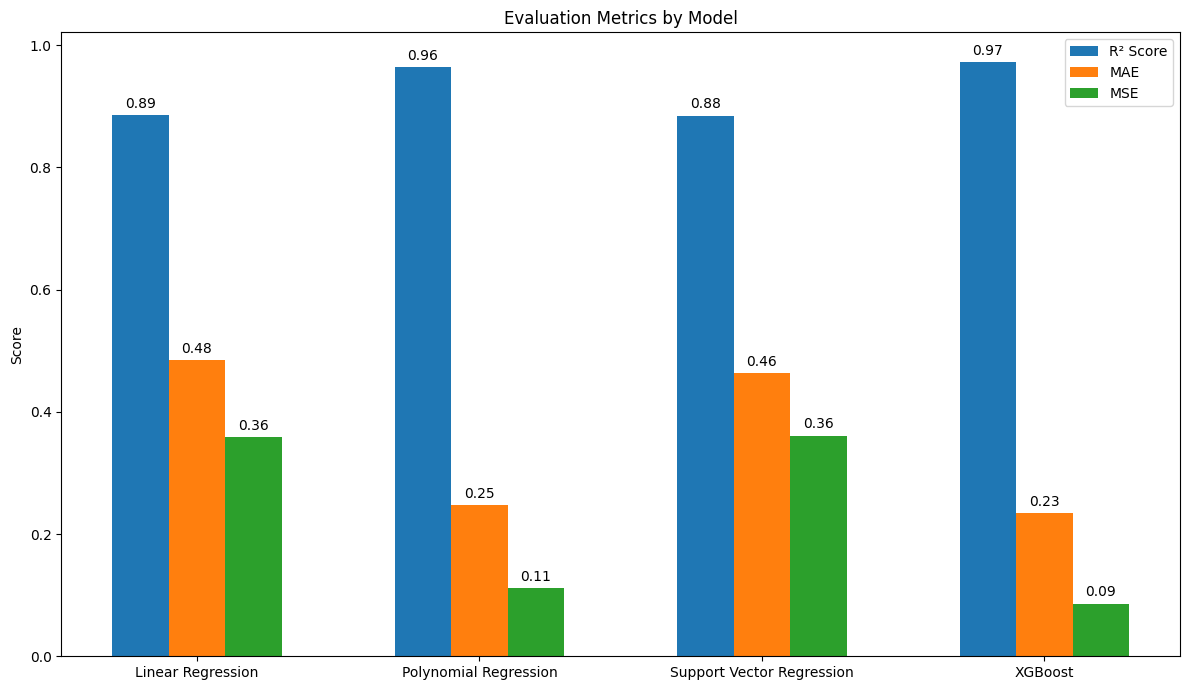

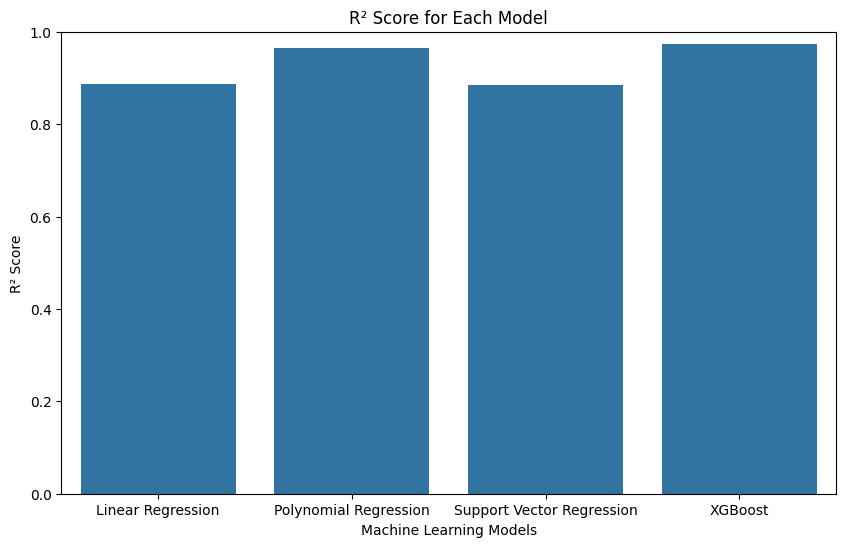

In [149]:
# Visualize the Evaluation Accuracy for the Four Models

# Prepare data for visualization
models = evaluation_table.index
r2_scores = evaluation_table['R2 Score'].values
mae_scores = evaluation_table['MAE'].values
mse_scores = evaluation_table['MSE'].values

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Plot R2 scores
rects1 = ax.bar(x - width, r2_scores, width, label='R² Score')
# Plot MAE scores
rects2 = ax.bar(x, mae_scores, width, label='MAE')
# Plot MSE scores
rects3 = ax.bar(x + width, mse_scores, width, label='MSE')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# Alternatively, visualize just R2 scores if preferred
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores)
plt.title('R² Score for Each Model')
plt.ylabel('R² Score')
plt.xlabel('Machine Learning Models')
plt.ylim(0, 1) # R2 score is typically between 0 and 1 for regression
plt.show()

In [147]:
# The best model based on R2 score (higher is better)
best_model_name = evaluation_table['R2 Score'].idxmax()
best_model_r2 = evaluation_table['R2 Score'].max()

print(f"\nThe best model based on R² score is: {best_model_name} with an R² of {best_model_r2:.4f}")


The best model based on R² score is: XGBoost with an R² of 0.9725


**Test Model**

In [148]:
view_mapping = {
    "Garden": 2,
    "Apartment Building": 1,
    "Street": 0,
    "Apartment": 1
}

facing_mapping = {
    "South": 1,
    "North": 0
}

elevator_mapping = {
    "Yes": 1,
    "No": 0
}

payment_mapping = {
    "Cash": 1,
    "Instalment": 0
}

view_name = input(f"Enter View {list(view_mapping.keys())}: ")
facing_name = input(f"Enter Facing {list(facing_mapping.keys())}: ")
elevator_name = input(f"Enter Elevator (Yes/No): ")
payment_name = input(f"Enter Payment System {list(payment_mapping.keys())}: ")

view = view_mapping.get(view_name)
facing = facing_mapping.get(facing_name)
elevator = elevator_mapping.get(elevator_name)
payment_system = payment_mapping.get(payment_name)

if None in [view, facing, elevator, payment_system]:
    print("Error: One or more inputs are invalid. Please check your spelling.")
    #exit() # Removed exit() to allow the notebook to continue
else:
    area = float(input("Enter Area (in square meters): "))
    bedroom = int(input("Enter Number of Bedrooms: "))
    bathroom = int(input("Enter Number of Bathrooms: "))
    floor = int(input("Enter Floor Number: "))

    # Create the new data as a list of lists, excluding 'location'
    new_data_list = [[area, bedroom, bathroom, floor, view, facing, elevator, payment_system]]

    # Convert to DataFrame and set columns using X_train.columns
    new_data = pd.DataFrame(new_data_list, columns=X_train.columns) # Changed Xtrain to X_train

    # Convert categorical columns to appropriate numerical types
    new_data['View'] = new_data['View'].astype(int)
    new_data['Facing'] = new_data['Facing'].astype(int)
    new_data['Elevator'] = new_data['Elevator'].astype(int)
    new_data['Payment System'] = new_data['Payment System'].astype(int)

    # Use the best performing model based on R2 score from the evaluation_table
    best_model_name = evaluation_table['R2 Score'].idxmax()
    if best_model_name == 'Linear Regression':
        best_model = LR_model
    elif best_model_name == 'Polynomial Regression':
        best_model = PLR_model
        new_data = poly.transform(new_data) # Transform new_data for polynomial regression
    elif best_model_name == 'Support Vector Regression':
        best_model = SVR_model
    elif best_model_name == 'XGBoost':
        best_model = XGB_model
    else:
        print("Error: Best model not found.")
        best_model = None # Set best_model to None in case of error

    if best_model is not None:
        predicted_price = best_model.predict(new_data)[0]
        print(f"Predicted House Price: {predicted_price:,.2f} EGP")

KeyboardInterrupt: Interrupted by user

**Save Model**

In [150]:
import pickle

with open("house_price_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved successfully!")

Model saved successfully!
